## <font color="red"> ESERCIZIO 08

### <font color="blue"> Parte 01 e 02

Nel resto del notebook ho utilizzato le unità naturali $\hbar=m=1$.

Per prima cosa adatto l'algoritmo Metropolis già implementato e scrivo le funzioni da campionare; poi scrivo l'hamiltoniana: per fare questo, calcolo a mano le derivate della funzione d'onda di prova e implemento la sua espressione finale

$$ \Psi_T^{\sigma,\mu}(x) = e^{-\frac{(x-\mu)^2}{2\sigma^2}}+e^{-\frac{(x+\mu)^2}{2\sigma^2}} \\
\Longrightarrow H=-\frac{1}{2}\psi''(x)+V(x)=-\frac{1}{2\sigma^2}\left[-\psi(x)+(x-\mu)^2e^{-\frac{(x-\mu)^2}{2\sigma^2}}+(x+\mu)^2e^{-\frac{(x+\mu)^2}{2\sigma^2}}\right] + V(x).
$$

Successivamente effettuo un primo test utilizzando 10000 steps (dopo averne scartati 1000) con ampiezza di 2.3 in modo da avere un rapporto di accettati/totali di circa il 55%. I parametri di input scelti sono $\mu=1$ e $\sigma=0.5$.

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

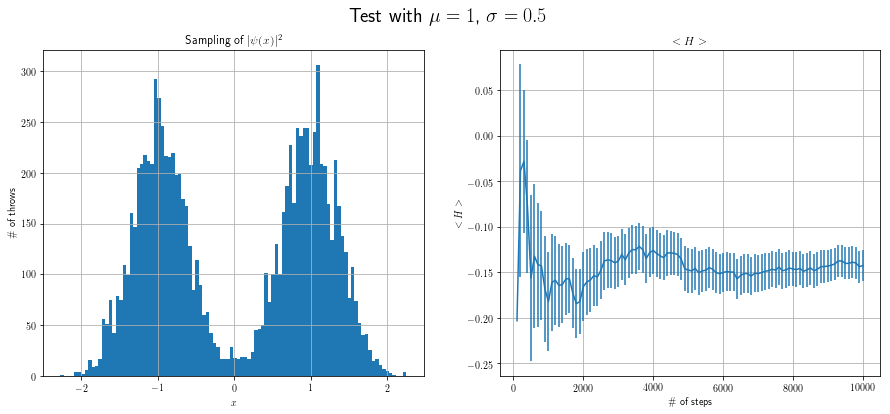

In [2]:
plt.rc('text', usetex=True)

plt.figure(figsize=(15,6))

plt.suptitle('Test with $\mu=1$, $\sigma=0.5$',fontsize=20)

plt.subplot(121)
plt.title('Sampling of $|\psi(x)|^2$')
pr = np.loadtxt("Risultati/psi2_cam.prova", usecols=(0), unpack='true')
plt.hist(pr, 100)

plt.xlabel('$x$')
plt.ylabel('$\#$ of throws')
plt.grid(True)

plt.subplot(122)
plt.title('$<H>$')
x, y, erry = np.loadtxt("Risultati/En.prova", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(x, y, yerr=erry)

plt.xlabel('$\#$ of steps')
plt.ylabel('$<H>$')
plt.grid(True)

plt.show()

Per minimizzare i parametri ho seguito questo procedimento:
1. scelgo dei valori iniziali e finali per $\mu$ e $\sigma$, poi fisso uno step;
2. costruisco un reticolo al variare di ogni possibile coppia e calcolo l'energia per ogni coppia;
3. al minimo dell'energia faccio corrispondere i valori preferiti di $\mu_{ott}$ e $\sigma_{ott}$;
4. campiono la funzione d'onda ottimizzata e stampo l'energia con l'incertezza.

Dopo qualche tentativo e osservando il potenziale, scelgo $\mu\in[0.7,1]$ in steps da 0.01 e $\sigma\in[0.4,0.8]$ in steps da 0.01. L'algoritmo Metropolis usa lo stesso numero di steps e l'ampiezza di prima. 

Con questa scelta si ottiene $E_{min}=-0.453$, $\mu_{ott}=0.82$ e $\sigma_{ott}=0.6$ (mostrati alla fine dell'esecuzione del programma); tutte le possibili triplette $(\mu,\sigma,E)$ sono consultabili nel file `matrix.dat`. I risultati sono i seguenti:

In [3]:
def psi2_T(x, mu, sigma):
    psi = np.exp( -(x-mu)**2/(2.*sigma**2) ) + np.exp( -(x+mu)**2/(2.*sigma**2) )
    norm = 2. * sigma * np.sqrt(np.pi) * ( 1. + np.exp(-mu**2/sigma**2) )
    return  psi**2/norm

def Vpot(x):
    return (x**2 - 2.5)*x**2

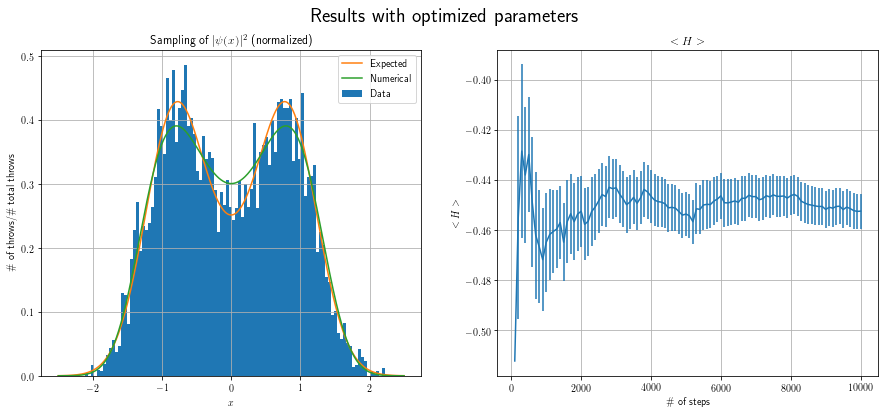

In [4]:
N = 1000
mu = 0.82
sigma = 0.6

x = np.linspace(-2.5, 2.5, N)
dx = x[1] - x[0] # the step size

V = Vpot(x)
y = psi2_T(x, mu, sigma)

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H = (-CDiff)/(2*dx**2) + np.diag(V)
E,psi = np.linalg.eigh(H)

psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

plt.figure(figsize=(15,6))
plt.suptitle('Results with optimized parameters',fontsize=20)

plt.subplot(121)
plt.title('Sampling of $|\psi(x)|^2$ (normalized)')
pr = np.loadtxt("Risultati/Psi.min", usecols=(0), unpack='true')
plt.hist(pr, 100, density=True, label='Data')
plt.plot(x,y, label='Expected')
plt.plot(x,(psi[0])**2, label='Numerical')

plt.xlabel('$x$')
plt.ylabel('$\#$ of throws/$\#$ total throws')
plt.legend()
plt.grid(True)

plt.subplot(122)
plt.title('$<H>$')
x, y, erry = np.loadtxt("Risultati/En.min", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(x, y, yerr=erry)

plt.xlabel('$\#$ of steps')
plt.ylabel('$<H>$')
plt.grid(True)

plt.show()

Il precedente plot sulla sinistra è normalizzato per poter essere fittato con le curve attese; in particolare, *Expected* è l'andamento della funzione d'onda di prova valutata con $(\mu_{ott},\sigma_{ott})$ mentre *Numerical* è la soluzione dell'equazione di Schroedinger proposta nel testo.

Si vede che i parametri ottenuti non sono ancora i migliori dato che la forma delle due curve (e del valore dell'energia ottenuto) sono un po' discostati.

### <font color="blue"> Parte 03
    
Modifico il codice fornito includendo il potenziale (e le sue derivate) e la funzione d'onda di prova coi parametri ottimizzati. Ottengo i seguenti risultati:

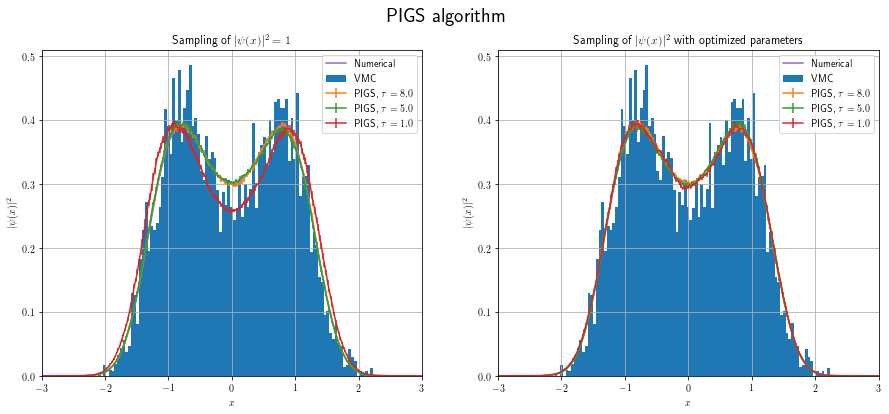

In [5]:
t = np.linspace(-2.5, 2.5, N)

plt.figure(figsize=(15,6))
plt.suptitle('PIGS algorithm',fontsize=20)

plt.subplot(121)
plt.title('Sampling of $|\psi(x)|^2=1$')
pr = np.loadtxt("Risultati/Psi.min", usecols=(0), unpack='true')
plt.hist(pr, 100, density=True, label='VMC')
x, y, erry = np.loadtxt("QMC_1D/PIGS_1/probability80.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, y, yerr=erry, label=r'PIGS, $\tau=8.0$')
x, y, erry = np.loadtxt("QMC_1D/PIGS_1/probability50.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, y, yerr=erry, label=r'PIGS, $\tau=5.0$')
x, y, erry = np.loadtxt("QMC_1D/PIGS_1/probability10.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, y, yerr=erry, label=r'PIGS, $\tau=1.0$')
plt.plot(t,(psi[0])**2, label='Numerical')

plt.xlabel('$x$')
plt.ylabel('$|\psi(x)|^2$')
plt.xlim(-3,3)
plt.legend()
plt.grid(True)

plt.subplot(122)
plt.title('Sampling of $|\psi(x)|^2$ with optimized parameters')
pr = np.loadtxt("Risultati/Psi.min", usecols=(0), unpack='true')
plt.hist(pr, 100, density=True, label='VMC')
x, y, erry = np.loadtxt("QMC_1D/PIGS_ott/probability80.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, y, yerr=erry, label=r'PIGS, $\tau=8.0$')
x, y, erry = np.loadtxt("QMC_1D/PIGS_ott/probability50.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, y, yerr=erry, label=r'PIGS, $\tau=5.0$')
x, y, erry = np.loadtxt("QMC_1D/PIGS_ott/probability10.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, y, yerr=erry, label=r'PIGS, $\tau=1.0$')
plt.plot(t ,(psi[0])**2, label='Numerical')

plt.xlabel('$x$')
plt.ylabel('$|\psi(x)|^2$')
plt.xlim(-3,3)
plt.grid(True)
plt.legend()

plt.show()

Si vede come per grandi *imaginary-time evolution* $\tau$ la forma della funzione d'onda di prova è irrilevante e *PIGS* produce lo stesso risultato che è in perfetto accordo con la soluzione numerica. Diminuendo $\tau$ invece si vede che utilizzando la funzione d'onda ottimizzata ricavata sopra il risultato non cambia molto, mentre se si utilizza quella costante il risultato peggiora.

Infine ripeto col codice *PIMC* variando un po' la temperatura:

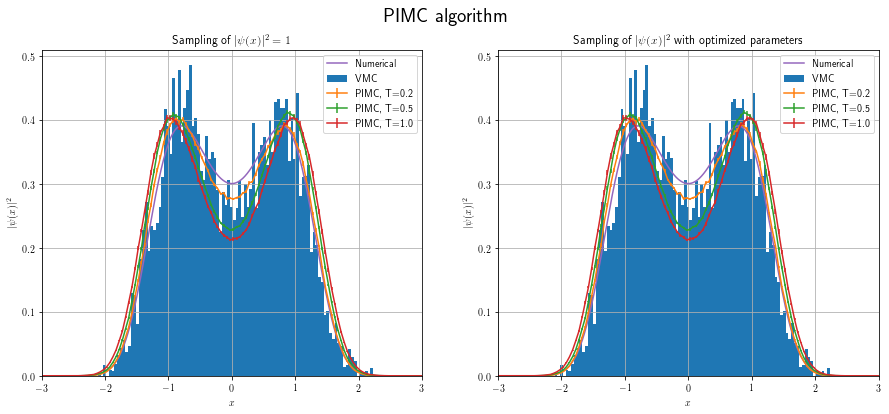

In [6]:
plt.figure(figsize=(15,6))
plt.suptitle('PIMC algorithm',fontsize=20)

plt.subplot(121)
plt.title('Sampling of $|\psi(x)|^2=1$')
pr = np.loadtxt("Risultati/Psi.min", usecols=(0), unpack='true')
plt.hist(pr, 100, density=True, label='VMC')
x, y, erry = np.loadtxt("QMC_1D/PIMC_1/probability02.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, y, yerr=erry, label='PIMC, T=0.2')
x, y, erry = np.loadtxt("QMC_1D/PIMC_1/probability05.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, y, yerr=erry, label='PIMC, T=0.5')
x, y, erry = np.loadtxt("QMC_1D/PIMC_1/probability10.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, y, yerr=erry, label='PIMC, T=1.0')
plt.plot(t,(psi[0])**2, label='Numerical')

plt.xlabel('$x$')
plt.ylabel('$|\psi(x)|^2$')
plt.xlim(-3,3)
plt.legend()
plt.grid(True)

plt.subplot(122)
plt.title('Sampling of $|\psi(x)|^2$ with optimized parameters')
pr = np.loadtxt("Risultati/Psi.min", usecols=(0), unpack='true')
plt.hist(pr, 100, density=True, label='VMC')
x, y, erry = np.loadtxt("QMC_1D/PIMC_ott/probability02.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, y, yerr=erry, label='PIMC, T=0.2')
x, y, erry = np.loadtxt("QMC_1D/PIMC_ott/probability05.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, y, yerr=erry, label='PIMC, T=0.5')
x, y, erry = np.loadtxt("QMC_1D/PIMC_ott/probability10.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, y, yerr=erry, label='PIMC, T=1.0')
plt.plot(t,(psi[0])**2, label='Numerical')

plt.xlabel('$x$')
plt.ylabel('$|\psi(x)|^2$')
plt.xlim(-3,3)
plt.legend()
plt.grid(True)

plt.show()

In questo caso si vede nuovamente che la forma funzione d'onda di prova è irrilevante dato che si ottengono gli stessi risultati. Si nota inoltre che già a $T=0.2$ il risultato non rispecchia esattamente la soluzione analitica e peggiora aumentando la temperatura (dato che si popolano anche gli stati eccitati).